In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
from pathlib import Path
data=str(Path.cwd().joinpath('breast Cancer.csv'))

In [50]:
df=pd.read_csv(data)

In [51]:
df.shape

(569, 33)

In [52]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#Droping columns not needed
df=df.drop(['id','Unnamed: 32'],axis=1)

In [6]:
#Features and target selection
X=df.drop('diagnosis',axis=1)
y=df.diagnosis

In [7]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Number of Benign Tumours:  357
Number of Malignant Tumours :  212


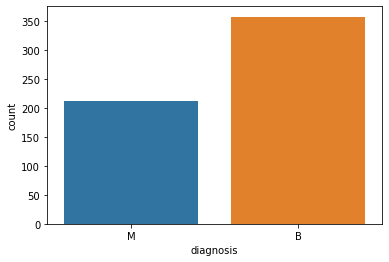

In [8]:
#EDA
sns.countplot(y)
B,M=y.value_counts()
print('Number of Benign Tumours: ',B)
print('Number of Malignant Tumours : ',M)

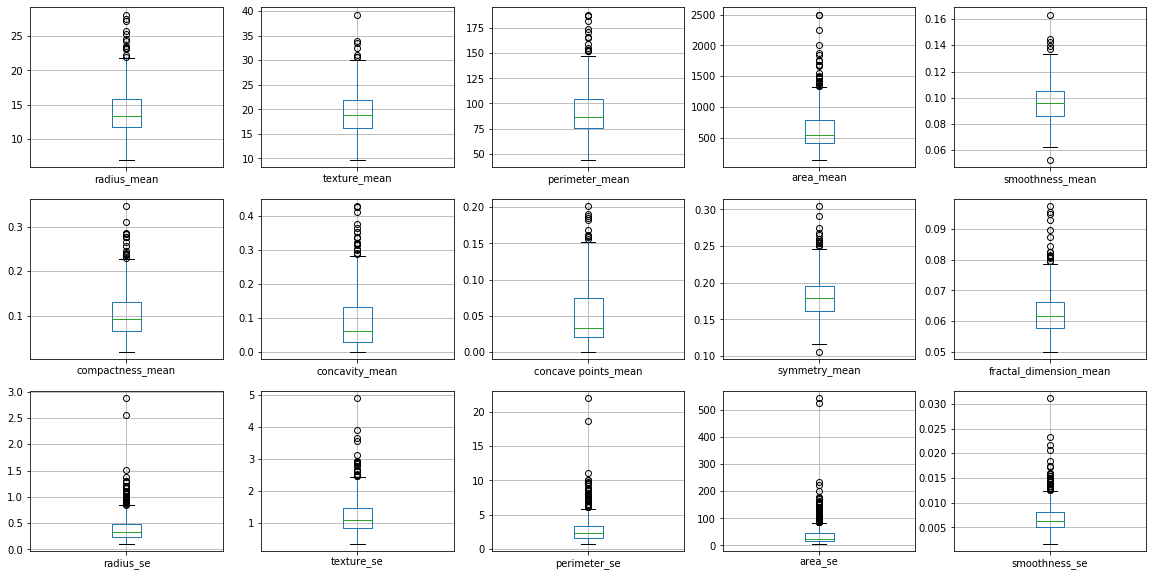

In [9]:
X.iloc[:,:15].plot(kind='box', subplots=True, layout=(3,5),figsize=(20,10),grid=True)
plt.show()  

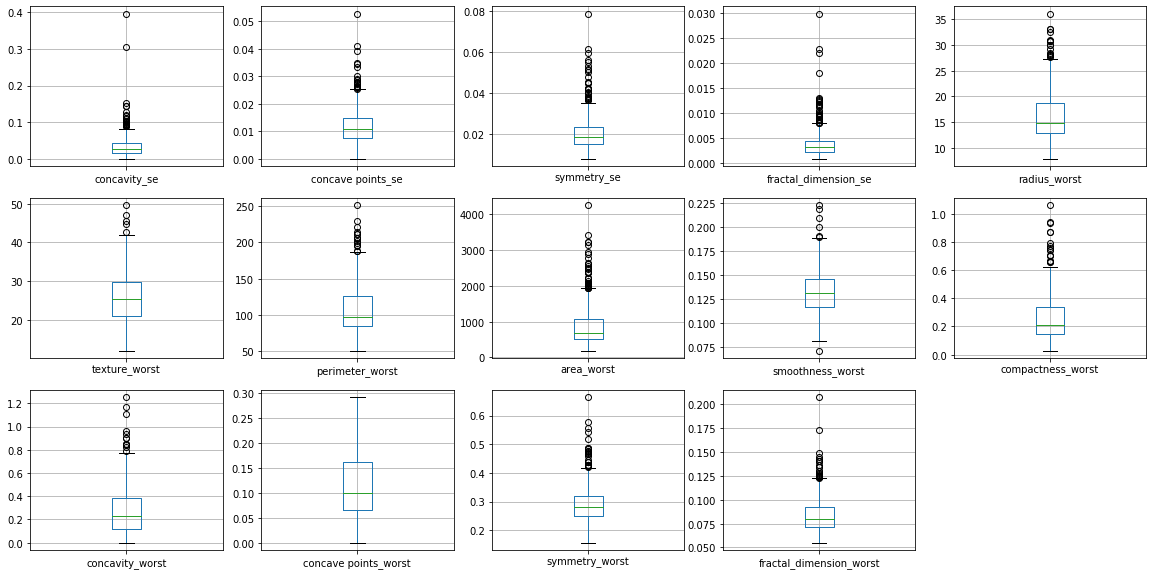

In [10]:
X.iloc[:,16:30].plot(kind='box', subplots=True, layout=(3,5),figsize=(20,10),grid=True)
plt.show()

In [11]:
Variance=X.describe().transpose()[['mean','std']]
print(Variance)

                               mean         std
radius_mean               14.127292    3.524049
texture_mean              19.289649    4.301036
perimeter_mean            91.969033   24.298981
area_mean                654.889104  351.914129
smoothness_mean            0.096360    0.014064
compactness_mean           0.104341    0.052813
concavity_mean             0.088799    0.079720
concave points_mean        0.048919    0.038803
symmetry_mean              0.181162    0.027414
fractal_dimension_mean     0.062798    0.007060
radius_se                  0.405172    0.277313
texture_se                 1.216853    0.551648
perimeter_se               2.866059    2.021855
area_se                   40.337079   45.491006
smoothness_se              0.007041    0.003003
compactness_se             0.025478    0.017908
concavity_se               0.031894    0.030186
concave points_se          0.011796    0.006170
symmetry_se                0.020542    0.008266
fractal_dimension_se       0.003795    0

In [12]:
Variance=pd.DataFrame(Variance)

In [13]:
Features_to_Scale=Variance[(Variance['mean']>1)|(Variance['std']>1)].index.tolist()

In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
#Scaling the necessary columns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer((StandardScaler(), Features_to_Scale),remainder='passthrough')

In [16]:
column_trans.fit_transform(X_train)

array([[ 0.35581987, -1.72664707,  0.41303118, ...,  0.1827    ,
         0.3216    ,  0.101     ],
       [-0.37326674,  0.50881308, -0.39469992, ...,  0.05601   ,
         0.2488    ,  0.08151   ],
       [ 1.4033581 , -0.15144941,  1.34799923, ...,  0.2091    ,
         0.3537    ,  0.08294   ],
       ...,
       [ 0.02898794, -0.56411347, -0.0829084 , ...,  0.03333   ,
         0.2458    ,  0.0612    ],
       [-0.05760855,  0.09614902, -0.04957475, ...,  0.1827    ,
         0.3179    ,  0.1055    ],
       [-0.5604269 ,  0.30837625, -0.61462066, ...,  0.07431   ,
         0.2694    ,  0.06878   ]])

In [17]:
#Instantiate logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(solver='lbfgs')

In [18]:
#Instantiating make_pipe with parameters logistic regression and standard scalers
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(column_trans, logreg)

In [19]:
#Cross Validation score on Training set
cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy').mean()

0.9523926760768866

In [20]:
pipe.fit(X_test, y_test)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'radius_worst',
                  

In [21]:
cross_val_score(pipe, X_test, y_test, cv=10, scoring='accuracy').mean()

0.9681286549707602

In [22]:
from sklearn.metrics import f1_score,confusion_matrix

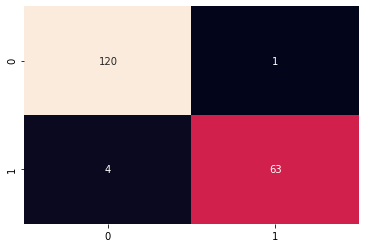

In [23]:
cm=confusion_matrix(y_test,pipe.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d",cbar=False)
plt.show()

In [24]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [25]:
#How sensitive is our model?
print((TP / float(TP + FN))*100)

94.02985074626866


In [26]:
#How precise is our model?
print((TP / float(TP + FP))*100)

98.4375
